# Q1 Analysis: Fastest-Inflating Food Categories (CPI & PPI)

**Analysis Question: Which food categories have had the fastest increase in prices over the past 20–50 years?**

We will explore this question using two preprocessed forecast datasets:

- Historical Consumer Price Index (CPI) forecast series  
- Historical Producer Price Index (PPI) forecast series  

Each contains annual percent-change forecasts by food-related category from 1974–2024.

To quantify "fastest increase," we will measure the average annual percent change in each category over different time windows:

- A long-run window (~50 years): 1974–2024* 
- A recent window (20 years): 2004–2024

For each dataset (CPI and PPI), we will:

1. Convert wide data to tidy long format (`Year`, `category`, `pct_change`)  
2. Compute mean annual inflation by category within each window  
3. Rank categories and identify the top 5 fastest-inflating categories  
4. Compare whether categories that inflate quickly in CPI also do so in PPI


## Imports + Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

cpi_wide = pd.read_csv("../data/processed/processed_cpi.csv")
ppi_wide = pd.read_csv("../data/processed/processed_ppi.csv")

cpi_wide.head(), ppi_wide.head()


(   Year  All_food  Beef_and_veal  Cereals_and_bakery_products  Dairy_products  \
 0  1974      14.3            2.9                         29.9            18.6   
 1  1975       8.5            1.0                         11.3             3.1   
 2  1976       3.0           -3.2                         -2.2             8.1   
 3  1977       6.3           -0.7                          1.6             2.7   
 4  1978       9.9           22.9                          9.0             6.8   
 
    Eggs  Fats_and_oils  Fish_and_seafood  Food_at_home  Food_away_from_home  \
 0   0.4           41.9              15.3          14.9                 12.7   
 1  -1.8           10.7               8.5           8.2                  9.4   
 2   9.2          -12.5              11.7           2.1                  6.8   
 3  -3.2           10.1              10.8           5.9                  7.6   
 4  -5.4            9.6               9.4          10.5                  9.1   
 
    ...  Fruits_and_vege

## Convert to tidy long format

The preprocessed files are in wide format (one column per category). For analysis, we will convert them to long format with columns:

- `Year`
- `category`
- `pct_change` (annual percent change forecast)

In [6]:
def wide_to_long(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert wide-format data (Year + category columns) into long format.

    Returns a DataFrame with columns: Year, category, pct_change.
    """
    long_df = df.melt(
        id_vars="Year",
        var_name="category",
        value_name="pct_change",
    )
    return long_df

cpi_long = wide_to_long(cpi_wide)
ppi_long = wide_to_long(ppi_wide)

cpi_long.head(), ppi_long.head()


(   Year  category  pct_change
 0  1974  All_food        14.3
 1  1975  All_food         8.5
 2  1976  All_food         3.0
 3  1977  All_food         6.3
 4  1978  All_food         9.9,
    Year           category  pct_change
 0  1974  Farm_level_cattle       -10.2
 1  1975  Farm_level_cattle        -1.7
 2  1976  Farm_level_cattle        -7.1
 3  1977  Farm_level_cattle         2.3
 4  1978  Farm_level_cattle        32.4)

## Defining the metric: average annual percent change

For each category and time window, we compute `pct_change,' which is the annual percent change forecast in that category. A higher value means the category is, on average, expected to experience faster price growth in that period.


In [12]:
# Helper function:
def mean_inflation_by_category(df_long: pd.DataFrame,
                               start_year: int,
                               end_year: int) -> pd.Series:
    """
    Compute mean annual percent change per category within a given year window.

    Parameters
    ----------
    df_long : pd.DataFrame
        Long-format data with columns: Year, category, pct_change.
    start_year : int
        Inclusive start of the window.
    end_year : int
        Inclusive end of the window.

    Returns
    -------
    pd.Series
        Mean pct_change per category, sorted descending order.
    """
    window = df_long[
        (df_long["Year"] >= start_year) & (df_long["Year"] <= end_year)
    ]
    means = (
        window.groupby("category")["pct_change"]
        .mean()
        .sort_values(ascending=False)
    )
    return means

# Define Time Windows:
full_start, full_end = 1974, 2024   # ~50-year window
recent_start, recent_end = 2004, 2024  # Last 20 years

(full_start, full_end), (recent_start, recent_end)


((1974, 2024), (2004, 2024))

## CPI: Fastest-inflating categories (long-run vs last 20 years)

We first look at CPI forecasts and compute average annual inflation by category for:

- 1974–2024 (approximately 50 years)
- 2004–2024 (recent 20-year window)


### Compute Means

In [13]:
cpi_mean_full = mean_inflation_by_category(cpi_long, full_start, full_end)
cpi_mean_recent = mean_inflation_by_category(cpi_long, recent_start, recent_end)

cpi_mean_full.head(), cpi_mean_recent.head()


(category
 Sugar_and_sweets               4.588235
 Fresh_fruits                   4.576471
 Cereals_and_bakery_products    4.321569
 Food_away_from_home            4.278431
 Fresh_fruits_and_vegetables    4.268627
 Name: pct_change, dtype: float64,
 category
 Beef_and_veal          4.395238
 Eggs                   4.304762
 Fats_and_oils          3.519048
 Food_away_from_home    3.423810
 Meats                  3.376190
 Name: pct_change, dtype: float64)

### Top 5 Tables

In [14]:
cpi_top5_full = cpi_mean_full.head(5)
cpi_top5_recent = cpi_mean_recent.head(5)

cpi_top5_full, cpi_top5_recent


(category
 Sugar_and_sweets               4.588235
 Fresh_fruits                   4.576471
 Cereals_and_bakery_products    4.321569
 Food_away_from_home            4.278431
 Fresh_fruits_and_vegetables    4.268627
 Name: pct_change, dtype: float64,
 category
 Beef_and_veal          4.395238
 Eggs                   4.304762
 Fats_and_oils          3.519048
 Food_away_from_home    3.423810
 Meats                  3.376190
 Name: pct_change, dtype: float64)

### Bar Plots

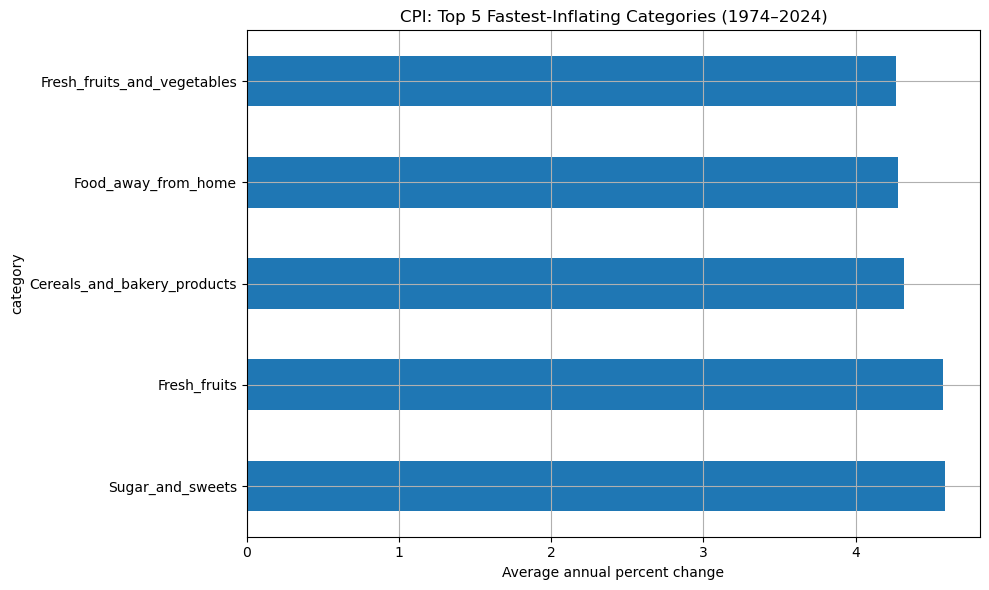

In [15]:
fig, ax = plt.subplots()
cpi_top5_full.plot(kind="barh", ax=ax)
ax.set_title("CPI: Top 5 Fastest-Inflating Categories (1974–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.show()


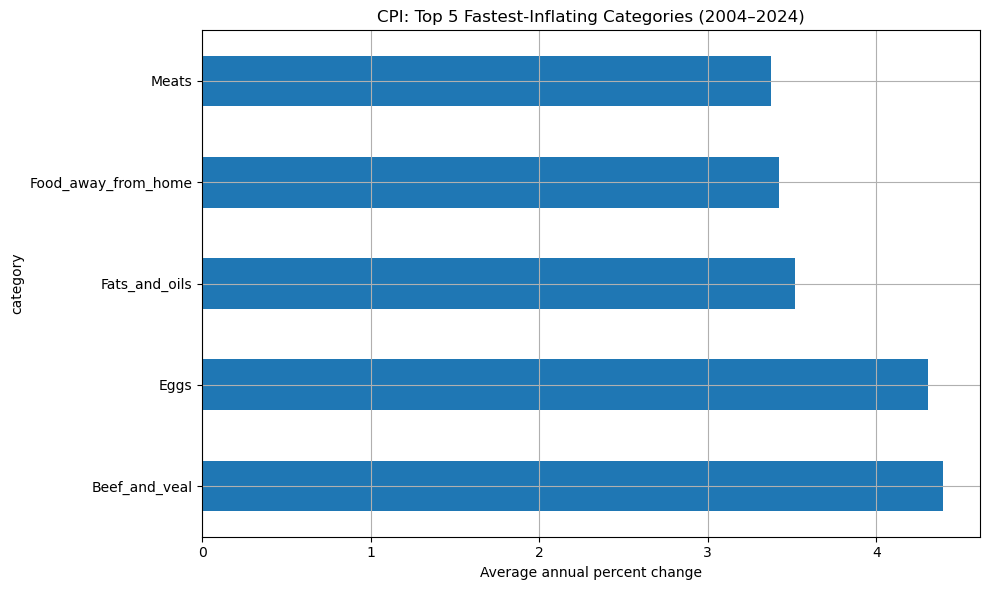

In [16]:
fig, ax = plt.subplots()
cpi_top5_recent.plot(kind="barh", ax=ax)
ax.set_title("CPI: Top 5 Fastest-Inflating Categories (2004–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.show()


## PPI: Fastest-inflating categories (long-run vs last 20 years)

We will now repeat the same analysis using PPI forecasts, which focus on producer-level prices.


### Compute means

In [17]:
ppi_mean_full = mean_inflation_by_category(ppi_long, full_start, full_end)
ppi_mean_recent = mean_inflation_by_category(ppi_long, recent_start, recent_end)

ppi_mean_full.head(), ppi_mean_recent.head()


(category
 Farm_level_eggs            6.534694
 Wholesale_fats_and_oils    4.131373
 Farm_level_milk            3.476471
 Farm_level_vegetables      3.450980
 Wholesale_beef             3.409804
 Name: pct_change, dtype: float64,
 category
 Farm_level_eggs            13.176190
 Farm_level_wheat            5.128571
 Farm_level_milk             4.914286
 Wholesale_fats_and_oils     4.890476
 Farm_level_vegetables       4.747619
 Name: pct_change, dtype: float64)

### Top 5 Tables

In [18]:
ppi_top5_full = ppi_mean_full.head(5)
ppi_top5_recent = ppi_mean_recent.head(5)

ppi_top5_full, ppi_top5_recent


(category
 Farm_level_eggs            6.534694
 Wholesale_fats_and_oils    4.131373
 Farm_level_milk            3.476471
 Farm_level_vegetables      3.450980
 Wholesale_beef             3.409804
 Name: pct_change, dtype: float64,
 category
 Farm_level_eggs            13.176190
 Farm_level_wheat            5.128571
 Farm_level_milk             4.914286
 Wholesale_fats_and_oils     4.890476
 Farm_level_vegetables       4.747619
 Name: pct_change, dtype: float64)

### Bar Plots 

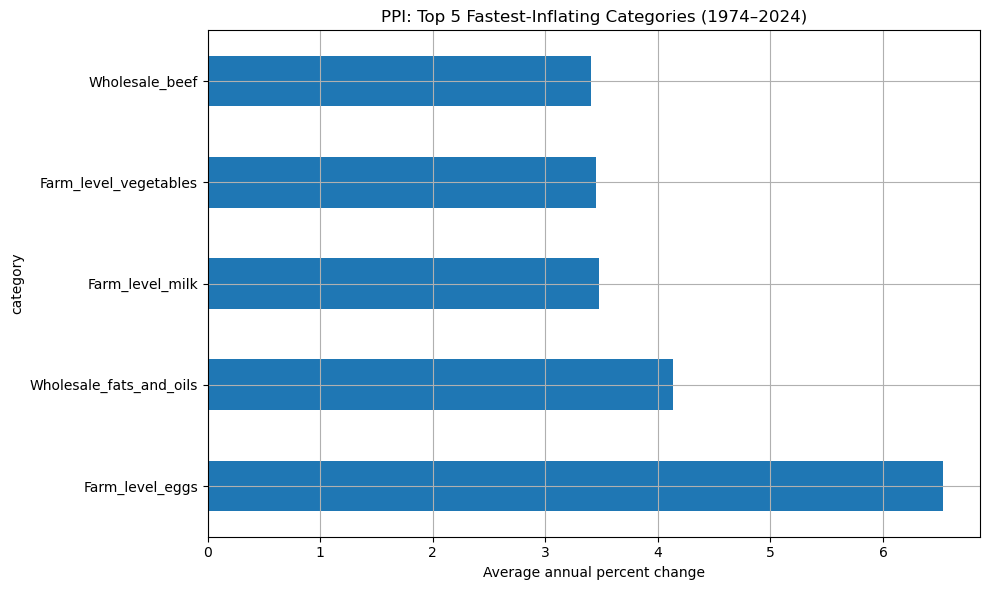

In [19]:
fig, ax = plt.subplots()
ppi_top5_full.plot(kind="barh", ax=ax)
ax.set_title("PPI: Top 5 Fastest-Inflating Categories (1974–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.show()


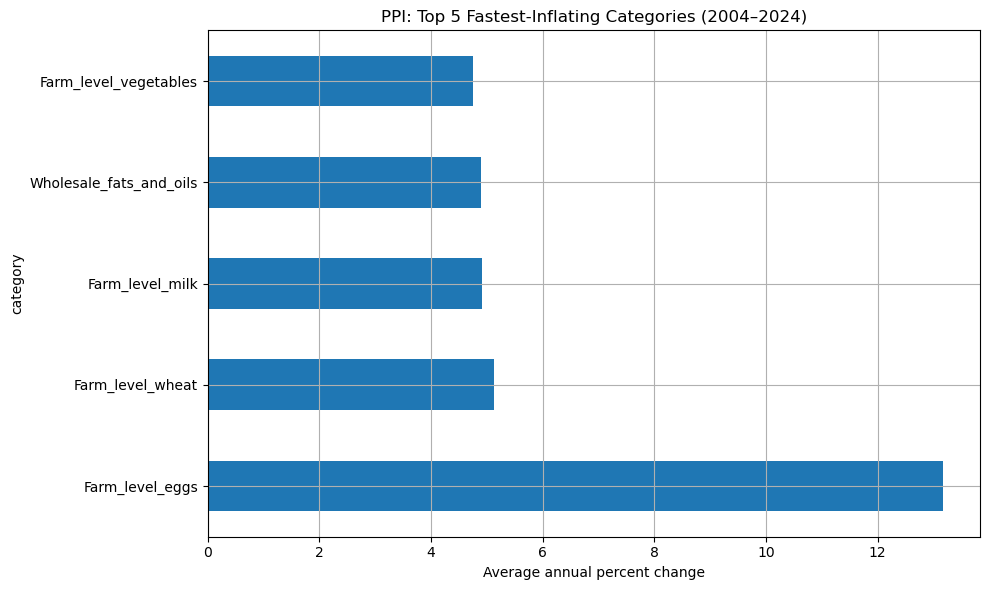

In [20]:
fig, ax = plt.subplots()
ppi_top5_recent.plot(kind="barh", ax=ax)
ax.set_title("PPI: Top 5 Fastest-Inflating Categories (2004–2024)")
ax.set_xlabel("Average annual percent change")
plt.tight_layout()
plt.show()


# Side-by-Side Comparison Tables

## CPI:

In [26]:
cpi_q1_summary = pd.DataFrame({
    "CPI_top5_full": cpi_top5_full.index,
    "CPI_full_mean": cpi_top5_full.values,
    "CPI_top5_recent": cpi_top5_recent.index,
    "CPI_recent_mean": cpi_top5_recent.values,
})

cpi_q1_summary


,CPI_top5_full,CPI_full_mean,CPI_top5_recent,CPI_recent_mean
0,Sugar_and_sweets,4.588235,Beef_and_veal,4.395238
1,Fresh_fruits,4.576471,Eggs,4.304762
2,Cereals_and_bakery_products,4.321569,Fats_and_oils,3.519048
3,Food_away_from_home,4.278431,Food_away_from_home,3.423810
4,Fresh_fruits_and_vegetables,4.268627,Meats,3.376190


## PPI:

In [27]:
ppi_q1_summary = pd.DataFrame({
    "PPI_top5_full": ppi_top5_full.index,
    "PPI_full_mean": ppi_top5_full.values,
    "PPI_top5_recent": ppi_top5_recent.index,
    "PPI_recent_mean": ppi_top5_recent.values,
})

ppi_q1_summary


,PPI_top5_full,PPI_full_mean,PPI_top5_recent,PPI_recent_mean
0,Farm_level_eggs,6.534694,Farm_level_eggs,13.176190
1,Wholesale_fats_and_oils,4.131373,Farm_level_wheat,5.128571
2,Farm_level_milk,3.476471,Farm_level_milk,4.914286
3,Farm_level_vegetables,3.450980,Wholesale_fats_and_oils,4.890476
4,Wholesale_beef,3.409804,Farm_level_vegetables,4.747619


# Combine CPI + PPI into a single comparison table

In [28]:
combined_q1_summary = pd.DataFrame({
    "CPI_top5_full": cpi_top5_full.index,
    "CPI_full_mean": cpi_top5_full.values,
    "PPI_top5_full": ppi_top5_full.index,
    "PPI_full_mean": ppi_top5_full.values,
    "CPI_top5_recent": cpi_top5_recent.index,
    "CPI_recent_mean": cpi_top5_recent.values,
    "PPI_top5_recent": ppi_top5_recent.index,
    "PPI_recent_mean": ppi_top5_recent.values,
})

combined_q1_summary


,CPI_top5_full,CPI_full_mean,PPI_top5_full,PPI_full_mean,CPI_top5_recent,CPI_recent_mean,PPI_top5_recent,PPI_recent_mean
0,Sugar_and_sweets,4.588235,Farm_level_eggs,6.534694,Beef_and_veal,4.395238,Farm_level_eggs,13.176190
1,Fresh_fruits,4.576471,Wholesale_fats_and_oils,4.131373,Eggs,4.304762,Farm_level_wheat,5.128571
2,Cereals_and_bakery_products,4.321569,Farm_level_milk,3.476471,Fats_and_oils,3.519048,Farm_level_milk,4.914286
3,Food_away_from_home,4.278431,Farm_level_vegetables,3.450980,Food_away_from_home,3.423810,Wholesale_fats_and_oils,4.890476
4,Fresh_fruits_and_vegetables,4.268627,Wholesale_beef,3.409804,Meats,3.376190,Farm_level_vegetables,4.747619


# Saving Results

In [29]:
import os

os.makedirs("../data/processed/q1_outputs", exist_ok=True)

# Save CPI results:
cpi_mean_full.to_csv(
    "../data/processed/q1_outputs/cpi_mean_full_window.csv"
)

cpi_mean_recent.to_csv(
    "../data/processed/q1_outputs/cpi_mean_recent_window.csv"
)

cpi_q1_summary.to_csv(
    "../data/processed/q1_outputs/q1_cpi_top5_summary.csv",
    index=False
)


# Save PPI results:
ppi_mean_full.to_csv(
    "../data/processed/q1_outputs/ppi_mean_full_window.csv"
)

ppi_mean_recent.to_csv(
    "../data/processed/q1_outputs/ppi_mean_recent_window.csv"
)

ppi_q1_summary.to_csv(
    "../data/processed/q1_outputs/q1_ppi_top5_summary.csv",
    index=False
)


# Save combined CPI + PPI comparison table:
combined_q1_summary.to_csv(
    "../data/processed/q1_outputs/q1_combined_cpi_ppi_summary.csv",
    index=False
)

print("All Q1 outputs saved successfully!")


All Q1 outputs saved successfully!
